In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, StandardScaler, PolynomialFeatures
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, silhouette_score, SCORERS, f1_score
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

# SMOTE
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE, SMOTENC

import warnings
warnings.filterwarnings("ignore")

import time

In [2]:
report=[]
n=0

In [83]:
n=11

In [84]:
train1=pd.read_csv('train_1.csv')
train2=pd.read_csv('train_2.csv')
train=pd.merge(train1,train2,how='outer')

#train=pd.read_csv('train_1.csv')
train.columns=['Ref.No','Amount of the given credit (NT dollar)','Gender','Education',
               'Marital status','Age','repayment status in September','repayment status in August','default',
              'repayment status in july','repayment status in june','repayment status in may','repayment status in april',
              'Amount of bill statement','amount of bill statement in September', 'amount of bill statement in August',
              'amount of bill statement in July']
x_train=train.drop(['Ref.No','default'],axis=1)
y_train=train.default
#train.drop('Ref.No',axis=1,inplace=True)
x_test= pd.read_csv('test.csv')[['X1', 'X2', 'X3', 'X4', 
                                 'X5', 'X6', 'X7','X8','X9','X10','X11','X12','X13','X14','X15']]

x_test.columns=['Amount of the given credit (NT dollar)','Gender','Education',
               'Marital status','Age','repayment status in September','repayment status in August',
              'repayment status in july','repayment status in june','repayment status in may','repayment status in april',
              'Amount of bill statement','amount of bill statement in September', 'amount of bill statement in August',
              'amount of bill statement in July']

#x_resampled,y_resampled=SMOTE(sampling_strategy=.3).fit_resample(x_train,y_train)
#print('SMOTE_x',x_resampled.shape)
#print('SMOTE_y',y_resampled.shape)

x_t=pd.concat([x_train,x_test])
cluster = KMeans(n_clusters=4).fit_predict(x_t)
x_t['cluster']=cluster
x_train=x_t.iloc[:21600,:]
x_test=x_t.iloc[21600:,:]



#scaling
ss= StandardScaler()
scaledx_train= ss.fit_transform(x_train)
scaledx_test=ss.transform(x_test)

dt=RandomForestClassifier()
#params={'criterion':['gini','entropy'],'max_depth':[2,3,5,8,10,15,20,30,40,60,100,None],'min_samples_split':range(2,102,10),'min_samples_leaf':range(1,10),'max_features':[1,5,10,None],'random_state':[1,200,3000]}
#gs=GridSearchCV(dt,param_grid={'max_depth':range(2,20,2)})
#bg=AdaBoostClassifier(base_estimator=lr,algorithm='SAMME',learning_rate=.2,n_estimators=20)
model=dt.fit(scaledx_train,y_train)
scores=cross_val_score(model,scaledx_train,y_train)

y_pred=model.predict(scaledx_test)

n+=1

report.append([time.ctime(),str(model).partition('(')[0]+str(n),'Accuracy',scores.mean(),scores.var(),scores.std()*2,
               'RF+ clustering',model])

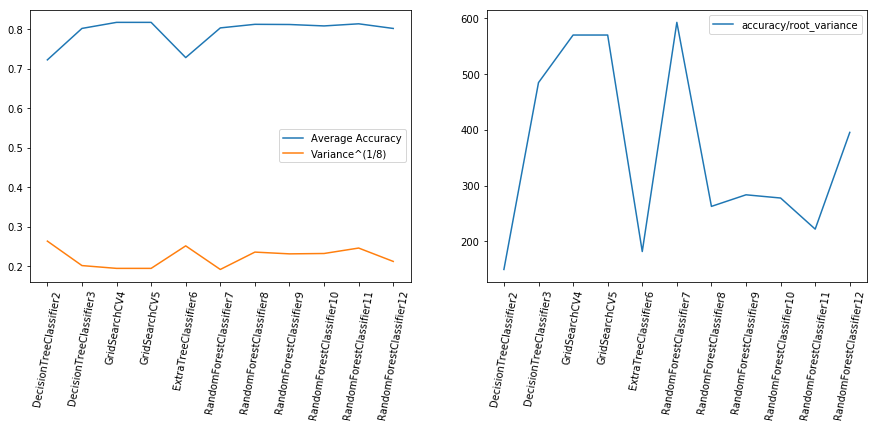

,Time_Stamp,Metric,Metric(Avg.),Variance,CI(+/-),Remark,stored model
Model,,,,,,,
DecisionTreeClassifier2,Tue Aug 6 01:11:54 2019,Accuracy,0.722408,0.000023,0.009656,default DT classifier,"DecisionTreeClassifier(class_weight=None, crit..."
DecisionTreeClassifier3,Tue Aug 6 01:12:21 2019,Accuracy,0.802037,0.000003,0.003310,max_depth=10,"DecisionTreeClassifier(class_weight=None, crit..."
GridSearchCV4,Tue Aug 6 01:13:22 2019,Accuracy,0.817361,0.000002,0.002868,max_depth=10,"GridSearchCV(cv='warn', error_score='raise-dep..."
GridSearchCV5,Tue Aug 6 01:13:49 2019,Accuracy,0.817361,0.000002,0.002868,gridsearch for max_depth,"GridSearchCV(cv='warn', error_score='raise-dep..."
ExtraTreeClassifier6,Tue Aug 6 01:14:46 2019,Accuracy,0.728194,0.000016,0.008012,default ExtraTreeClassifier,"ExtraTreeClassifier(class_weight=None, criteri..."
RandomForestClassifier7,Tue Aug 6 01:19:35 2019,Accuracy,0.803333,0.000002,0.002711,default RF,"(DecisionTreeClassifier(class_weight=None, cri..."
RandomForestClassifier8,Tue Aug 6 01:20:56 2019,Accuracy,0.812407,0.000010,0.006185,RF n_estimators=100,"(DecisionTreeClassifier(class_weight=None, cri..."
RandomForestClassifier9,Tue Aug 6 01:25:59 2019,Accuracy,0.811944,0.000008,0.005729,RF n_estimators=5,"(DecisionTreeClassifier(class_weight=None, cri..."
RandomForestClassifier10,Tue Aug 6 01:26:33 2019,Accuracy,0.808333,0.000008,0.005822,RF n_estimators=20,"(DecisionTreeClassifier(class_weight=None, cri..."


In [85]:

Final_report=pd.DataFrame(report,columns=['Time_Stamp','Model', 'Metric', 'Metric(Avg.)', 'Variance', 'CI(+/-)','Remark','stored model'])
Final_report.set_index("Model",inplace=True)

plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(Final_report.index,Final_report['Metric(Avg.)'],label='Average Accuracy')
plt.plot(Final_report.index,np.sqrt(np.sqrt(np.sqrt(Final_report['Variance']))),label='Variance^(1/8)')
plt.xticks(rotation=80)
plt.legend()

plt.subplot(122)
plt.plot(Final_report.index,Final_report['Metric(Avg.)']/np.sqrt(Final_report['Variance']),label='accuracy/root_variance')
plt.xticks(rotation=80)
plt.legend()

plt.show()

Final_report

In [82]:
report=report[:-1]
n=n-1

In [46]:
Final_report.loc['GridSearchCV5','stored model']

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(2, 40, 4)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             s

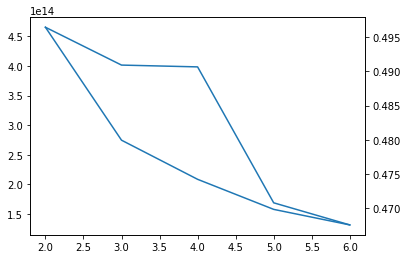

In [49]:
wcss=[]
silhautte=[]
clusters=[2,3,4,5,6]
for n in clusters:
    k=KMeans(n_clusters=n)
    cluster= k.fit(x_train).predict(x_train)
    wcss.append(k.inertia_)
    sil=silhouette_score(x_train,cluster)
    silhautte.append(sil)
ax=sns.lineplot(clusters,wcss,)
ax2 = ax.twinx()
sns.lineplot(clusters,silhautte,ax=ax2)

In [75]:
train1=pd.read_csv('train_1.csv')
train2=pd.read_csv('train_2.csv')
train=pd.merge(train1,train2,how='outer')

#train=pd.read_csv('train_1.csv')
train.columns=['Ref.No','Amount of the given credit (NT dollar)','Gender','Education',
               'Marital status','Age','repayment status in September','repayment status in August','default',
              'repayment status in july','repayment status in june','repayment status in may','repayment status in april',
              'Amount of bill statement','amount of bill statement in September', 'amount of bill statement in August',
              'amount of bill statement in July']
x_train=train.drop(['Ref.No','default'],axis=1)
y_train=train.default
#train.drop('Ref.No',axis=1,inplace=True)
x_test= pd.read_csv('test.csv')[['X1', 'X2', 'X3', 'X4', 
                                 'X5', 'X6', 'X7','X8','X9','X10','X11','X12','X13','X14','X15']]

x_test.columns=['Amount of the given credit (NT dollar)','Gender','Education',
               'Marital status','Age','repayment status in September','repayment status in August',
              'repayment status in july','repayment status in june','repayment status in may','repayment status in april',
              'Amount of bill statement','amount of bill statement in September', 'amount of bill statement in August',
              'amount of bill statement in July']

#x_resampled,y_resampled=SMOTE(sampling_strategy=.3).fit_resample(x_train,y_train)
#print('SMOTE_x',x_resampled.shape)
#print('SMOTE_y',y_resampled.shape)

x_t=pd.concat([x_train,x_test])
cluster = KMeans(n_clusters=4).fit_predict(x_t)
x_t['cluster']=cluster
x_train=x_t.iloc[:21600,:]
x_test=x_t.iloc[21600:,:]



#scaling
ss= StandardScaler()
scaledx_train= ss.fit_transform(x_train)
scaledx_test=ss.transform(x_test)

In [76]:
x_t.iloc[21600:,:].shape

(2399, 16)

In [77]:
x_test.shape

(2399, 16)

In [69]:
x_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23999 entries, 0 to 2398
Data columns (total 15 columns):
Amount of the given credit (NT dollar)    23999 non-null int64
Gender                                    23999 non-null int64
Education                                 23999 non-null int64
Marital status                            23999 non-null int64
Age                                       23999 non-null int64
repayment status in September             23999 non-null int64
repayment status in August                23999 non-null int64
repayment status in july                  23999 non-null int64
repayment status in june                  23999 non-null int64
repayment status in may                   23999 non-null int64
repayment status in april                 23999 non-null int64
Amount of bill statement                  23999 non-null int64
amount of bill statement in September     23999 non-null int64
amount of bill statement in August        23999 non-null int64
amount of 

In [108]:
#Dt
train1=pd.read_csv('train_1.csv')
train2=pd.read_csv('train_2.csv')
train3= pd.read_csv('train_3.csv')
train4=pd.merge(train1,train2,how='outer')
train=pd.merge(train4,train3,how='outer')

#train=pd.read_csv('train_1.csv')
train.columns=['Ref.No','Amount of the given credit (NT dollar)','Gender','Education',
               'Marital status','Age','repayment status in September','repayment status in August','default',
              'repayment status in july','repayment status in june','repayment status in may','repayment status in april',
              'Amount of bill statement','amount of bill statement in September', 'amount of bill statement in August',
              'amount of bill statement in July','amount of bill statement in May',
              'amount of bill statement in April','amount paid in September',
              'amount paid in August','amount paid in July',
              'amount paid in June','amount paid in May',
              'amount paid in April']
x_train=train.drop(['Ref.No','default'],axis=1)
y_train=train.default
#train.drop('Ref.No',axis=1,inplace=True)
x_test= pd.read_csv('test.csv')[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
                                 'X8','X9','X10','X11','X12','X13','X14',
                                 'X15','X16','X17','X18','X19','X20','X21','X22','X23']]

x_test.columns=['Amount of the given credit (NT dollar)','Gender','Education',
               'Marital status','Age','repayment status in September','repayment status in August',
              'repayment status in july','repayment status in june','repayment status in may','repayment status in april',
              'Amount of bill statement','amount of bill statement in September', 'amount of bill statement in August',
              'amount of bill statement in July','amount of bill statement in May',
              'amount of bill statement in April','amount paid in September',
              'amount paid in August','amount paid in July',
              'amount paid in June','amount paid in May',
              'amount paid in April']

#x_train=x_train.drop(['Marital status'],axis=1)
#x_test=x_test.drop(['Marital status'],axis=1)

#x_resampled,y_resampled=SMOTE(sampling_strategy=i).fit_resample(x_train,y_train)
#print('SMOTE_x',x_resampled.shape)
#print('SMOTE_y',y_resampled.shape)

#x_t=pd.concat([x_train,x_test])
#cluster = KMeans(n_clusters=3).fit_predict(x_t)
#x_t['cluster']=cluster
#x_train=x_t.iloc[:21600,:]
#x_test=x_t.iloc[21600:,:]



#scaling
ss= StandardScaler()
scaledx_train= ss.fit_transform(x_train)
scaledx_test=ss.transform(x_test)


dt=RandomForestClassifier()
#params={'criterion':['gini','entropy'],'max_depth':[2,3,5,8,10,15,20,30,40,60,100,None],'min_samples_split':range(2,102,10),'min_samples_leaf':range(1,10),'max_features':[1,5,10,None],'random_state':[1,200,3000]}
#gs=GridSearchCV(dt,param_grid={'max_depth':range(2,20,2)})
#bg=AdaBoostClassifier(base_estimator=lr,algorithm='SAMME',learning_rate=.2,n_estimators=20)
model=dt.fit(scaledx_train,y_train)
scores=cross_val_score(model,scaledx_train,y_train)

y_pred=model.predict(scaledx_test)

n+=1

report.append([time.ctime(),str(model).partition('(')[0]+str(n),'Accuracy',scores.mean(),scores.var(),scores.std()*2,
               'base RF- Marital status drop',model])

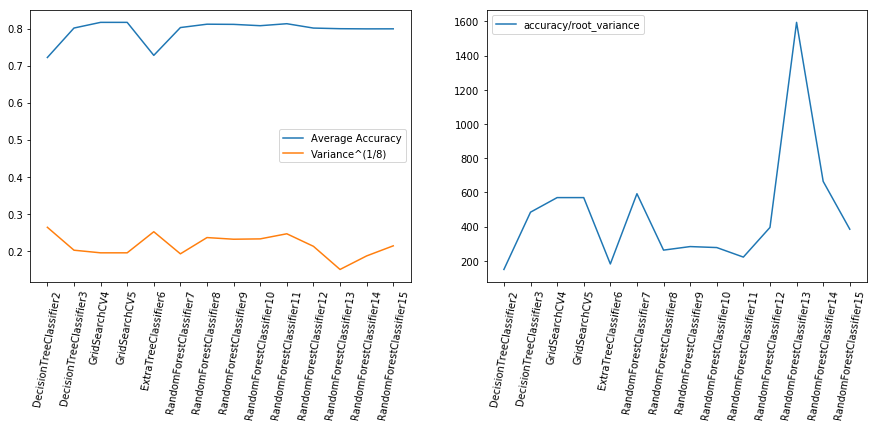

,Time_Stamp,Metric,Metric(Avg.),Variance,CI(+/-),Remark,stored model
Model,,,,,,,
DecisionTreeClassifier2,Tue Aug 6 01:11:54 2019,Accuracy,0.722408,2.330946e-05,0.009656,default DT classifier,"DecisionTreeClassifier(class_weight=None, crit..."
DecisionTreeClassifier3,Tue Aug 6 01:12:21 2019,Accuracy,0.802037,2.738983e-06,0.003310,max_depth=10,"DecisionTreeClassifier(class_weight=None, crit..."
GridSearchCV4,Tue Aug 6 01:13:22 2019,Accuracy,0.817361,2.057021e-06,0.002868,max_depth=10,"GridSearchCV(cv='warn', error_score='raise-dep..."
GridSearchCV5,Tue Aug 6 01:13:49 2019,Accuracy,0.817361,2.057021e-06,0.002868,gridsearch for max_depth,"GridSearchCV(cv='warn', error_score='raise-dep..."
ExtraTreeClassifier6,Tue Aug 6 01:14:46 2019,Accuracy,0.728194,1.604974e-05,0.008012,default ExtraTreeClassifier,"ExtraTreeClassifier(class_weight=None, criteri..."
RandomForestClassifier7,Tue Aug 6 01:19:35 2019,Accuracy,0.803333,1.837560e-06,0.002711,default RF,"(DecisionTreeClassifier(class_weight=None, cri..."
RandomForestClassifier8,Tue Aug 6 01:20:56 2019,Accuracy,0.812407,9.563688e-06,0.006185,RF n_estimators=100,"(DecisionTreeClassifier(class_weight=None, cri..."
RandomForestClassifier9,Tue Aug 6 01:25:59 2019,Accuracy,0.811944,8.204698e-06,0.005729,RF n_estimators=5,"(DecisionTreeClassifier(class_weight=None, cri..."
RandomForestClassifier10,Tue Aug 6 01:26:33 2019,Accuracy,0.808333,8.473324e-06,0.005822,RF n_estimators=20,"(DecisionTreeClassifier(class_weight=None, cri..."


In [109]:

Final_report=pd.DataFrame(report,columns=['Time_Stamp','Model', 'Metric', 'Metric(Avg.)', 'Variance', 'CI(+/-)','Remark','stored model'])
Final_report.set_index("Model",inplace=True)

plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(Final_report.index,Final_report['Metric(Avg.)'],label='Average Accuracy')
plt.plot(Final_report.index,np.sqrt(np.sqrt(np.sqrt(Final_report['Variance']))),label='Variance^(1/8)')
plt.xticks(rotation=80)
plt.legend()

plt.subplot(122)
plt.plot(Final_report.index,Final_report['Metric(Avg.)']/np.sqrt(Final_report['Variance']),label='accuracy/root_variance')
plt.xticks(rotation=80)
plt.legend()

plt.show()

Final_report

In [96]:
y_pred=Final_report.loc['RandomForestClassifier13','stored model'].predict(scaledx_test)

[0.06120347 0.01155257 0.02115881 0.01459877 0.06540096 0.08013366
 0.05756812 0.0207451  0.02853375 0.02363293 0.01935233 0.06026931
 0.05675308 0.04897093 0.05354162 0.05138727 0.04928253 0.04989833
 0.05066298 0.04415594 0.04231267 0.04334629 0.04553857]


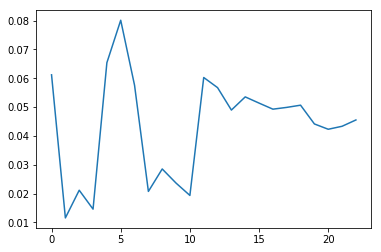

In [102]:
plt.plot(Final_report.loc['RandomForestClassifier13','stored model'].feature_importances_)
print(Final_report.loc['RandomForestClassifier13','stored model'].feature_importances_)

In [113]:
start_time=time.time()
#code
end_time=time.time()
time_taken=end_time-start_time
print(time_taken)

0.0
